# *+ Processing with CHM & RN & biomass data +*

# Load all data from .csv file

In [1]:
# Import main libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Load biomass dataset
biomass_data = '/home/dima/Desktop/JupyterLab/GIS and ML algoritms/5_Processing_data_for_level_sites/Main_CHM_spectral_Site2020.csv'
df = pd.read_csv(biomass_data)
df.head()

,Site #,WGS84 N,WGS 84 E,Origin,Origin_ID,Dominant_specias,Species_ID,Cs_wood_Bq/kg,ln_Cs_wood,Sr_wood_Bq/kg,...,idm_g_Q25,idm_g_Q50,idm_g_Q75,idm_b_MIN,idm_b_MAX,idm_b_MEAN,idm_b_STD,idm_b_Q25,idm_b_Q50,idm_b_Q75
0,1,51.435741,30.107979,n,0,Birch,2,920,6.824,10300,...,0.042167,0.050549,0.062270,0.017730,0.408966,0.059749,0.030217,0.043539,0.052312,0.064544
1,2,51.434093,30.108523,a,1,Pine,0,3600,8.189,15100,...,0.040919,0.048889,0.060698,0.020078,0.258602,0.057223,0.025515,0.043035,0.050941,0.062608
2,3,51.434163,30.109196,a,1,Pine,0,4360,8.380,14600,...,0.042397,0.050463,0.060603,0.020761,0.156265,0.056571,0.016629,0.045142,0.053495,0.064635
3,4,51.434217,30.110484,a,1,Pine,0,3420,8.137,12700,...,0.043719,0.052974,0.066027,0.017239,0.327465,0.060880,0.023964,0.046111,0.055601,0.069182
4,5,51.434056,30.111980,a,1,Pine,0,2200,7.696,12100,...,0.040659,0.049303,0.061803,0.014276,0.274420,0.057902,0.024283,0.043045,0.051566,0.065078


# List of all parameters for est. of bioproductivity and RN content
"""
All parameters:
'Cs_wood_Bq/kg', 'Sr_wood_Bq/kg', 'ln_Cs_wood', 'ln_Sr_wood', 'ln_Tag_Cs', 'ln_Tag_Sr',
'Cs_2021_kBq_m', 'Sr_2021_kBq_m', 'AEDR_mean', 'Distance_km', 'Azimuth',
'Gs_cub_m', 'M_stem_kg_m2', 'M_stem_bark_kg_m2', 'M_crown_kg_m2', 'M_foliage_kg_m2', 'M_AG_kg_m2',
'ln_Gs_cub_m', 'ln_M_stem_kg_m2', 'ln_M_stem_bark_kg_m2', 'ln_M_crown_kg_m2', 'ln_M_foliage_kg_m2', 'ln_M_AG_kg_m2',
'%_cover', 'af_chm_MIN', 'af_chm_MAX', 'af_chm_MEAN', 'af_chm_STD', 'af_chm_Q25', 'af_chm_Q50', 'af_chm_Q75', 
'mf_chm_MIN', 'mf_chm_MAX', 'mf_chm_MEAN', 'mf_chm_STD', 'mf_chm_Q25', 'mf_chm_Q50', 'mf_chm_Q75', 
'r_MIN', 'r_MAX', 'r_MEAN', 'r_STD', 'r_Q25', 'r_Q50', 'r_Q75', 
'g_MIN', 'g_MAX', 'g_MEAN', 'g_STD', 'g_Q25', 'g_Q50', 'g_Q75', 
'b_MIN', 'b_MAX', 'b_MEAN', 'b_STD', 'b_Q25', 'b_Q50', 'b_Q75', 
'asm_r__MIN', 'asm_r_MAX', 'asm_r_MEAN', 'asm_r_STD', 'asm_r_Q25', 'asm_r_Q50', 'asm_r_Q75', 
'asm_g__MIN', 'asm_g_MAX', 'asm_g_MEAN', 'asm_g_STD', 'asm_g_Q25', 'asm_g_Q50', 'asm_g_Q75', 
'asm_b__MIN', 'asm_b_MAX', 'asm_b_MEAN', 'asm_b_STD', 'asm_b_Q25', 'asm_b_Q50', 'asm_b_Q75', 
'contr_r_MIN', 'contr_r_MAX', 'contr_r_MEAN', 'contr_r_STD', 'contr_r_Q25', 'contr_r_Q50', 'contr_r_Q75', 
'contr_g_MIN', 'contr_g_MAX', 'contr_g_MEAN', 'contr_g_STD', 'contr_g_Q25', 'contr_g_Q50', 'contr_g_Q75', 
'contr_b_MIN', 'contr_b_MAX', 'contr_b_MEAN', 'contr_b_STD', 'contr_b_Q25', 'contr_b_Q50', 'contr_b_Q75', 
'corr_r_MIN', 'corr_r_MAX', 'corr_r_MEAN', 'corr_r_STD', 'corr_r_Q25', 'corr_r_Q50', 'corr_r_Q75', 
'corr_g_MIN', 'corr_g_MAX', 'corr_g_MEAN', 'corr_g_STD', 'corr_g_Q25', 'corr_g_Q50', 'corr_g_Q75', 
'corr_b_MIN', 'corr_b_MAX', 'corr_b_MEAN', 'corr_b_STD', 'corr_b_Q25', 'corr_b_Q50', 'corr_b_Q75', 
'idm_r_MIN', 'idm_r_MAX', 'idm_r_MEAN', 'idm_r_STD', 'idm_r_Q25', 'idm_r_Q50', 'idm_r_Q75', 
'idm_g_MIN', 'idm_g_MAX', 'idm_g_MEAN', 'idm_g_STD', 'idm_g_Q25', 'idm_g_Q50', 'idm_g_Q75', 
'idm_b_MIN', 'idm_b_MAX', 'idm_b_MEAN', 'idm_b_STD', 'idm_b_Q25', 'idm_b_Q50', 'idm_b_Q75'

"""

In [4]:
# Selecting main working parameters
select = pd.DataFrame(df, columns= ['ln_Cs_wood', 'ln_Sr_wood', 'Cs_2021_kBq_m', 'Sr_2021_kBq_m', 'ln_Tag_Cs', 'ln_Tag_Sr', 'AEDR_mean',
                                    'mf_chm_MIN', 'mf_chm_MAX', 'mf_chm_MEAN', 'mf_chm_STD', 'mf_chm_Q25', 'mf_chm_Q50', 'mf_chm_Q75'])

# Show the first five columns
select.head()

,ln_Cs_wood,ln_Sr_wood,Cs_2021_kBq_m,Sr_2021_kBq_m,ln_Tag_Cs,ln_Tag_Sr,AEDR_mean,mf_chm_MIN,mf_chm_MAX,mf_chm_MEAN,mf_chm_STD,mf_chm_Q25,mf_chm_Q50,mf_chm_Q75
0,6.824,9.240,1912,784,-0.73,2.58,2.33,0.445070,19.097736,12.233545,4.193715,10.158340,13.747563,15.172448
1,8.189,9.622,2005,818,0.59,2.92,2.47,12.465903,17.704655,14.964220,0.932190,14.531339,15.015374,15.519281
2,8.380,9.589,2001,818,0.78,2.88,2.44,13.028298,17.559893,15.329449,0.846132,14.765771,15.384996,15.925676
3,8.137,9.449,2040,833,0.52,2.72,2.55,2.128231,20.676994,15.392742,1.873981,14.341608,15.447217,16.691563
4,7.696,9.401,1758,717,0.22,2.83,2.14,12.171553,21.851387,17.944009,1.057209,17.360054,17.947407,18.591763


# Pre-analysis of parameters

In [5]:
# Information on all columns of data frame
select.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ln_Cs_wood     103 non-null    float64
 1   ln_Sr_wood     103 non-null    float64
 2   Cs_2021_kBq_m  103 non-null    int64  
 3   Sr_2021_kBq_m  103 non-null    int64  
 4   ln_Tag_Cs      103 non-null    float64
 5   ln_Tag_Sr      103 non-null    float64
 6   AEDR_mean      103 non-null    float64
 7   mf_chm_MIN     103 non-null    float64
 8   mf_chm_MAX     103 non-null    float64
 9   mf_chm_MEAN    103 non-null    float64
 10  mf_chm_STD     103 non-null    float64
 11  mf_chm_Q25     103 non-null    float64
 12  mf_chm_Q50     103 non-null    float64
 13  mf_chm_Q75     103 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 11.4 KB


In [6]:
# Discribe statistic of forest sites by species and origin
df.groupby(['Dominant_specias'])['Cs_wood_Bq/kg', 'Sr_wood_Bq/kg'].describe()

/tmp/ipykernel_17802/725619848.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(['Dominant_specias'])['Cs_wood_Bq/kg', 'Sr_wood_Bq/kg'].describe()


Cs_wood_Bq/kg                                                \
                         count          mean          std      min       25%   
Dominant_specias                                                               
Alder                      4.0   3353.250000  4978.217444    360.0    864.75   
Aspen                      1.0  86400.000000          NaN  86400.0  86400.00   
Birch                     23.0   4489.043478  7412.075967     93.0    565.00   
Oak                        3.0   2550.000000  2248.088077    420.0   1375.00   
Pine                      71.0   3452.535211  7193.888267     34.0    590.00   
Spruce                     1.0    177.000000          NaN    177.0    177.00   

                                            Sr_wood_Bq/kg                \
                      50%      75%      max         count          mean   
Dominant_specias                                                          
Alder              1126.5   3615.0  10800.0           4.0   1534.000000   
Aspen             86400.0  86400.0  86400.0           1.0  65500.000000   
Birch              1360.0   3079.5  30700.0          23.0  67957.695652   
Oak                2330.0   3615.0   4900.0           3.0   2143.333333   
Pine               1040.0   2200.0  35200.0          71.0  15541.450704   
Spruce              177.0    177.0    177.0           1.0   2400.000000   

                                                                                
                            std      min      25%      50%      75%        max  
Dominant_specias                                                                
Alder                734.881396    526.0   1219.0   1755.0   2070.0     2100.0  
Aspen                       NaN  65500.0  65500.0  65500.0  65500.0    65500.0  
Birch             217382.739246   1260.0   4450.0   8030.0  20784.0  1050000.0  
Oak                 1338.220211    710.0   1535.0   2360.0   2860.0     3360.0  
Pine               41295.160700    435.0   2090.0   4780.0  11750.0   323600.0  
Spruce                      NaN   2400.0   2400.0   2400.0   2400.0     2400.0

In [7]:
# Descriptive statistics of main parameters
select.describe()

,ln_Cs_wood,ln_Sr_wood,Cs_2021_kBq_m,Sr_2021_kBq_m,ln_Tag_Cs,ln_Tag_Sr,AEDR_mean,mf_chm_MIN,mf_chm_MAX,mf_chm_MEAN,mf_chm_STD,mf_chm_Q25,mf_chm_Q50,mf_chm_Q75
count,103.00000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000
mean,7.04933,8.656485,3014.359223,1136.436893,-0.251845,2.464854,3.570291,3.368496,17.907784,13.045021,2.382738,11.855166,13.422223,14.656802
std,1.64946,1.472424,4988.505540,2019.773384,1.104536,0.904757,6.089170,4.845054,7.523377,6.609366,1.319795,6.675236,6.805070,6.896657
min,3.52600,6.075000,423.000000,98.000000,-3.030000,0.390000,0.480000,-0.018586,2.733019,1.293138,0.531612,0.847996,1.228214,1.638354
25%,6.31900,7.664000,635.500000,199.500000,-0.725000,1.805000,0.710000,0.482279,11.615798,8.206727,1.340784,7.084438,8.233259,9.008806
50%,6.95700,8.472000,1145.000000,362.000000,-0.020000,2.600000,1.290000,0.642883,18.269344,13.072916,2.048168,12.030712,13.787443,15.323065
75%,7.91350,9.421000,2423.500000,966.000000,0.520000,3.160000,2.960000,3.921804,22.751595,17.432255,3.059823,16.510120,17.911694,18.940561
max,11.36700,13.864000,25173.000000,10477.000000,1.650000,4.660000,36.590000,17.862923,36.355442,28.916548,7.129900,27.527491,29.512907,30.872034


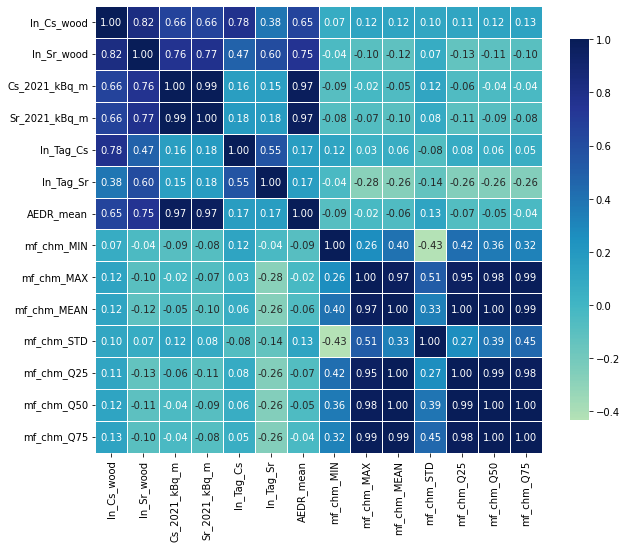

In [8]:
# Correlation matrix

import seaborn as sns # for correlation heatmap

def correlation_heatmap(train):
    correlations = train.corr()

    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f', cmap="YlGnBu",
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70}
                )
    plt.show();
    
correlation_heatmap(select)

# Selecting working columns for the XGBoost algorithms

In [9]:
# We select independent variables and predicting parameter 
X = pd.DataFrame(select, columns= ['mf_chm_MIN', 'mf_chm_MAX', 'mf_chm_MEAN', 'mf_chm_STD', 'mf_chm_Q25', 'mf_chm_Q50', 'mf_chm_Q75'])
y = pd.DataFrame(select, columns= ['ln_Tag_Sr'])

In [10]:
# Add to 'X' data colection new colomns with sintetic/random data: selest "Yes" or "No".
question=input("Choose an option - Add a synthetic column with random values!!! (Yes or No):")

if question == 'Yes':
    count = y.count()
    norm_random_1 = np.random.normal(10, 2, size=count)
    norm_random_2 = np.random.normal(10, 2, size=count)
    norm_random_3 = np.random.normal(10, 2, size=count)
    norm_random_4 = np.random.normal(10, 2, size=count)
    norm_random_5 = np.random.normal(10, 2, size=count)
    X['Random1'] = norm_random_1
    X['Random2'] = norm_random_2
    X['Random3'] = norm_random_3
    X['Random4'] = norm_random_4
    X['Random5'] = norm_random_5
    
    print('Selected "Yes"!!! A new column with random values was created.')
elif question == 'No':
    print('Selected "No"!!! A new column with random values was not created.')
else:
    print('Error!!! Typed no corectly text!!!')

Choose an option - Add a synthetic column with random values!!! (Yes or No): Yes


Selected "Yes"!!! A new column with random values was created.


In [11]:
# Columns in "X" data collections
X.head()

,mf_chm_MIN,mf_chm_MAX,mf_chm_MEAN,mf_chm_STD,mf_chm_Q25,mf_chm_Q50,mf_chm_Q75,Random1,Random2,Random3,Random4,Random5
0,0.445070,19.097736,12.233545,4.193715,10.158340,13.747563,15.172448,12.217406,9.279925,12.513942,7.914656,11.800341
1,12.465903,17.704655,14.964220,0.932190,14.531339,15.015374,15.519281,8.947627,7.422412,10.998120,14.017871,15.373132
2,13.028298,17.559893,15.329449,0.846132,14.765771,15.384996,15.925676,7.106377,11.055253,11.150621,10.418325,10.025445
3,2.128231,20.676994,15.392742,1.873981,14.341608,15.447217,16.691563,8.790870,8.225761,10.631086,10.428463,8.764720
4,12.171553,21.851387,17.944009,1.057209,17.360054,17.947407,18.591763,12.419163,4.574488,8.910345,11.068813,8.206642


In [12]:
# Columns in "y" data collections
y.head()

,ln_Tag_Sr
0,2.58
1,2.92
2,2.88
3,2.72
4,2.83


# Create first XGBoost model for estimate varibiality of output stats

In [13]:
#  Importing the main library for building model and its analysis
import xgboost as xgb
from scipy.stats import uniform, randint
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score, KFold, RandomizedSearchCV, train_test_split
from sklearn.datasets import make_classification

In [14]:
# K-Folds cross-validation for estimation "quality" of input data for building model
X_kfold = pd.DataFrame(X).to_numpy()
y_kfold = pd.DataFrame(y).to_numpy()

In [15]:
# Function for comparing datasets on homogeneity 
def display_scores(scores):
    print("    Scores: {0}\n    Mean: {1:.3f}\n    Std: {2:.3f}".format(scores, np.mean(scores), np.std(scores)))

In [16]:
# Output results of K-Folds cross-validation for XGBoost model
kfold = KFold(n_splits=3, shuffle=True)
scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
    
    scores.append(r2_score(y_test, y_pred))
    
print('R square (R2): \n')
display_scores((scores))
print('\n', 20*'-')


scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
      
    scores.append(mean_squared_error(y_test, y_pred))
    
print('Root-mean-square error (RMSE): \n')
display_scores(np.sqrt(scores))
print('\n', 20*'-')

scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
    
    scores.append(mean_absolute_error(y_test, y_pred))

print('Mean absolute error (MAE): \n')
display_scores((scores))
print('\n', 20*'-')

R square (R2): 

    Scores: [-0.06898206805983809, -0.1453019545785661, -0.09960654273670122]
    Mean: -0.105
    Std: 0.031

 --------------------
Root-mean-square error (RMSE): 

    Scores: [1.12606319 0.91791518 0.97191388]
    Mean: 1.005
    Std: 0.088

 --------------------
Mean absolute error (MAE): 

    Scores: [0.9191197293145316, 0.6719845289342544, 0.7532241345854366]
    Mean: 0.781
    Std: 0.103

 --------------------


# Find optimal hyperparameters for XGBoost model

In [17]:
# Create function for present of hyperparameters and main scores
def report_best_scores(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            global hps
            hps =  results['params'][candidate]
            print("")

In [18]:
# Tuning XGBoost parameters
xgb_model = xgb.XGBRegressor(objective="reg:squarederror", eval_metric="rmse")
params = {
    "colsample_bytree": uniform(0.05, 0.9),
    "gamma": uniform(0, 0.5),
    "learning_rate": uniform(0.01, 0.3), # default 0.1 
    "max_depth": randint(2, 5), # default 3
    "n_estimators": randint(50, 200), # default 100
    "subsample": uniform(0.3, 0.7)
}

search = RandomizedSearchCV(xgb_model, param_distributions=params, n_iter=30, cv=5, verbose=1, n_jobs=1, return_train_score=True)

search.fit(X, y)

report_best_scores(search.cv_results_, 1)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Model with rank: 1
Mean validation score: -0.147 (std: 0.305)
Parameters: {'colsample_bytree': 0.35067130154122733, 'gamma': 0.24857009370338745, 'learning_rate': 0.03048681040951371, 'max_depth': 2, 'n_estimators': 101, 'subsample': 0.3783282448131354}



In [19]:
# All output data for XGBoost models after tuning parameters
print(search.cv_results_)

{'mean_fit_time': array([0.58445044, 0.29060597, 0.29858661, 0.2885128 , 0.3738327 ,
       0.18790331, 0.24977794, 0.22578478, 0.37714248, 0.36872525,
       0.29914412, 0.47816181, 0.40721264, 0.2064518 , 0.39881616,
       0.31070185, 0.20846868, 0.29461327, 0.46072035, 0.29501519,
       0.47278404, 0.21958928, 0.26150317, 0.27509375, 0.14014554,
       0.51443148, 0.25947447, 0.1506969 , 0.3510736 , 0.14152837]), 'std_fit_time': array([0.15498105, 0.09734157, 0.07198058, 0.0093132 , 0.00498078,
       0.00517124, 0.02878519, 0.00829586, 0.0090511 , 0.01273903,
       0.00506223, 0.0092901 , 0.02926526, 0.0064632 , 0.01544904,
       0.00585915, 0.00650563, 0.00815877, 0.02424176, 0.02482017,
       0.00582235, 0.01631485, 0.00875323, 0.00438969, 0.0015648 ,
       0.04380201, 0.01337358, 0.00951596, 0.00988537, 0.00378204]), 'mean_score_time': array([0.00666585, 0.00651693, 0.00607257, 0.00693092, 0.00617361,
       0.00632792, 0.00597997, 0.00596862, 0.00765972, 0.00603538,
     

In [20]:
# Overwrite hyperparameters data for the next step/stage
p1 = hps['colsample_bytree']     # colsample_bytree
print('Colsample_bytree: ' + str(p1))

p2 = hps['gamma']                # gamma
print('Gamma: ' + str(p2))

p3 = hps['learning_rate']        # learning_rate
print('Learning_rate: ' + str(p3))

p4 = hps['max_depth']            # max_depth
print('Max_depth: ' + str(p4))

p5 = hps['n_estimators']         # n_estimators
print('N_estimators: ' + str(p5))

p6 = hps['subsample']            # subsample
print('Subsample: ' + str(p6))

Colsample_bytree: 0.35067130154122733
Gamma: 0.24857009370338745
Learning_rate: 0.03048681040951371
Max_depth: 2
N_estimators: 101
Subsample: 0.3783282448131354


# Estimation of a basic XGBoost model using Loops

In [21]:
# Create DMatrix (is an internal data structure) 
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [23]:
# Aggregate parameters
aggr_optimal_n=[]
aggr_bias=[]
aggr_rel_bias=[]
aggr_rmse=[]
aggr_rel_rmse=[]
aggr_mse=[]
aggr_R_square=[]

# Body loop
for i in range(30):
    
    # Generate test and training samples
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    # Implementation of the scikit-learn API for XGBoost regression
    xgb_model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=p1, gamma=p2, learning_rate=p3, 
                          max_depth=p4, n_estimators=p5, subsample=p6, eval_metric=["rmse"])
    
    # Fitting the model 
    xgb_model.fit(X_train, y_train, early_stopping_rounds=20, eval_set=[(X_train, y_train), (X_test, y_test)])
    
    # learning dynamics
    y_pred = xgb_model.predict(X_test, ntree_limit=xgb_model.best_ntree_limit)
    
    # Iteration with the best result
    optimal_n= xgb_model.best_ntree_limit-1
    
    # Convert data to 'array' type
    conv_y_pred = pd.DataFrame(y_pred) # Double transformation
    y_pred2 = conv_y_pred.values
    y_test2 = y_test.values
    
    # Intermediate results
    n_sample = len(y_pred2)
    y_mean_sample = y_test.sum() / n_sample
    
    # Calculation of bias
    diff = y_pred2 - y_test2
    bias = diff.sum()
    rel_bias = bias/y_mean_sample
    
    # Calculation of RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rel_rmse = rmse/y_mean_sample    
        
    # Calculation of MSE
    mse = mean_squared_error(y_test, y_pred)   
    
    # Calculation of Square R
    R_square = r2_score(y_test, y_pred)
    
    #Add values to lists    
    aggr_optimal_n.append(optimal_n)
    aggr_bias.append(bias)
    aggr_rel_bias.append(rel_bias)
    aggr_rmse.append(rmse)
    aggr_rel_rmse.append(rel_rmse)
    aggr_mse.append(mse)
    aggr_R_square.append(R_square)

[0]	validation_0-rmse:2.07068	validation_1-rmse:2.26629


/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[1]	validation_0-rmse:2.02172	validation_1-rmse:2.21636
[2]	validation_0-rmse:1.97617	validation_1-rmse:2.16921
[3]	validation_0-rmse:1.93547	validation_1-rmse:2.12672
[4]	validation_0-rmse:1.89611	validation_1-rmse:2.08683
[5]	validation_0-rmse:1.85705	validation_1-rmse:2.04154
[6]	validation_0-rmse:1.81314	validation_1-rmse:1.99741
[7]	validation_0-rmse:1.76903	validation_1-rmse:1.95136
[8]	validation_0-rmse:1.72636	validation_1-rmse:1.91396
[9]	validation_0-rmse:1.68999	validation_1-rmse:1.87311
[10]	validation_0-rmse:1.65334	validation_1-rmse:1.83600
[11]	validation_0-rmse:1.61459	validation_1-rmse:1.79652
[12]	validation_0-rmse:1.58588	validation_1-rmse:1.76813
[13]	validation_0-rmse:1.55811	validation_1-rmse:1.73707
[14]	validation_0-rmse:1.52083	validation_1-rmse:1.69558
[15]	validation_0-rmse:1.49374	validation_1-rmse:1.67101
[16]	validation_0-rmse:1.46671	validation_1-rmse:1.64908
[17]	validation_0-rmse:1.43278	validation_1-rmse:1.61455
[18]	validation_0-rmse:1.41353	validatio

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-rmse:1.88632	validation_1-rmse:2.01345
[5]	validation_0-rmse:1.84360	validation_1-rmse:1.96919
[6]	validation_0-rmse:1.80124	validation_1-rmse:1.92783
[7]	validation_0-rmse:1.75977	validation_1-rmse:1.88864
[8]	validation_0-rmse:1.72530	validation_1-rmse:1.85517
[9]	validation_0-rmse:1.68909	validation_1-rmse:1.81900
[10]	validation_0-rmse:1.65351	validation_1-rmse:1.78151
[11]	validation_0-rmse:1.62574	validation_1-rmse:1.75289
[12]	validation_0-rmse:1.59292	validation_1-rmse:1.72008
[13]	validation_0-rmse:1.56292	validation_1-rmse:1.68696
[14]	validation_0-rmse:1.52459	validation_1-rmse:1.64784
[15]	validation_0-rmse:1.49505	validation_1-rmse:1.61942
[16]	validation_0-rmse:1.46495	validation_1-rmse:1.59101
[17]	validation_0-rmse:1.43367	validation_1-rmse:1.56331
[18]	validation_0-rmse:1.40744	validation_1-rmse:1.54116
[19]	validation_0-rmse:1.38119	validation_1-rmse:1.51634
[20]	validation_0-rmse:1.35190	validation_1-rmse:1.48370
[21]	validation_0-rmse:1.32800	valida

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[5]	validation_0-rmse:1.84359	validation_1-rmse:2.00625
[6]	validation_0-rmse:1.80221	validation_1-rmse:1.97165
[7]	validation_0-rmse:1.76211	validation_1-rmse:1.93000
[8]	validation_0-rmse:1.72403	validation_1-rmse:1.89147
[9]	validation_0-rmse:1.69101	validation_1-rmse:1.84987
[10]	validation_0-rmse:1.65983	validation_1-rmse:1.83007
[11]	validation_0-rmse:1.61342	validation_1-rmse:1.77830
[12]	validation_0-rmse:1.58271	validation_1-rmse:1.74422
[13]	validation_0-rmse:1.54848	validation_1-rmse:1.71002
[14]	validation_0-rmse:1.51794	validation_1-rmse:1.67723
[15]	validation_0-rmse:1.49079	validation_1-rmse:1.64984
[16]	validation_0-rmse:1.46131	validation_1-rmse:1.62236
[17]	validation_0-rmse:1.42947	validation_1-rmse:1.59088
[18]	validation_0-rmse:1.40317	validation_1-rmse:1.56483
[19]	validation_0-rmse:1.37334	validation_1-rmse:1.53472
[20]	validation_0-rmse:1.34400	validation_1-rmse:1.51127
[21]	validation_0-rmse:1.32642	validation_1-rmse:1.49423
[22]	validation_0-rmse:1.30024	valid

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-rmse:1.88422	validation_1-rmse:2.05661
[5]	validation_0-rmse:1.83669	validation_1-rmse:2.00801
[6]	validation_0-rmse:1.79658	validation_1-rmse:1.96145
[7]	validation_0-rmse:1.76365	validation_1-rmse:1.92880
[8]	validation_0-rmse:1.72290	validation_1-rmse:1.88667
[9]	validation_0-rmse:1.68614	validation_1-rmse:1.84675
[10]	validation_0-rmse:1.64829	validation_1-rmse:1.81244
[11]	validation_0-rmse:1.61264	validation_1-rmse:1.77411
[12]	validation_0-rmse:1.57826	validation_1-rmse:1.73701
[13]	validation_0-rmse:1.54863	validation_1-rmse:1.70533
[14]	validation_0-rmse:1.51847	validation_1-rmse:1.68102
[15]	validation_0-rmse:1.49394	validation_1-rmse:1.66104
[16]	validation_0-rmse:1.46122	validation_1-rmse:1.63264
[17]	validation_0-rmse:1.43353	validation_1-rmse:1.60818
[18]	validation_0-rmse:1.40675	validation_1-rmse:1.57642
[19]	validation_0-rmse:1.37904	validation_1-rmse:1.55116
[20]	validation_0-rmse:1.34701	validation_1-rmse:1.51970
[21]	validation_0-rmse:1.32017	valida

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-rmse:1.94313	validation_1-rmse:1.72712
[5]	validation_0-rmse:1.90506	validation_1-rmse:1.69667
[6]	validation_0-rmse:1.85828	validation_1-rmse:1.64982
[7]	validation_0-rmse:1.81086	validation_1-rmse:1.60505
[8]	validation_0-rmse:1.76905	validation_1-rmse:1.56971
[9]	validation_0-rmse:1.73611	validation_1-rmse:1.54172
[10]	validation_0-rmse:1.69361	validation_1-rmse:1.49619
[11]	validation_0-rmse:1.65590	validation_1-rmse:1.46237
[12]	validation_0-rmse:1.61413	validation_1-rmse:1.42925
[13]	validation_0-rmse:1.58047	validation_1-rmse:1.40072
[14]	validation_0-rmse:1.54236	validation_1-rmse:1.37447
[15]	validation_0-rmse:1.50934	validation_1-rmse:1.34590
[16]	validation_0-rmse:1.48193	validation_1-rmse:1.31851
[17]	validation_0-rmse:1.44764	validation_1-rmse:1.29941
[18]	validation_0-rmse:1.41268	validation_1-rmse:1.26804
[19]	validation_0-rmse:1.37926	validation_1-rmse:1.23887
[20]	validation_0-rmse:1.34705	validation_1-rmse:1.20600
[21]	validation_0-rmse:1.32159	valida

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[3]	validation_0-rmse:1.95803	validation_1-rmse:1.99460
[4]	validation_0-rmse:1.90503	validation_1-rmse:1.94235
[5]	validation_0-rmse:1.85876	validation_1-rmse:1.89638
[6]	validation_0-rmse:1.81476	validation_1-rmse:1.85203
[7]	validation_0-rmse:1.77635	validation_1-rmse:1.81186
[8]	validation_0-rmse:1.74175	validation_1-rmse:1.78713
[9]	validation_0-rmse:1.69855	validation_1-rmse:1.74404
[10]	validation_0-rmse:1.66506	validation_1-rmse:1.72028
[11]	validation_0-rmse:1.63188	validation_1-rmse:1.69905
[12]	validation_0-rmse:1.59392	validation_1-rmse:1.66147
[13]	validation_0-rmse:1.55565	validation_1-rmse:1.62619
[14]	validation_0-rmse:1.51866	validation_1-rmse:1.59045
[15]	validation_0-rmse:1.48758	validation_1-rmse:1.55417
[16]	validation_0-rmse:1.46232	validation_1-rmse:1.52578
[17]	validation_0-rmse:1.43381	validation_1-rmse:1.49752
[18]	validation_0-rmse:1.40776	validation_1-rmse:1.47605
[19]	validation_0-rmse:1.37691	validation_1-rmse:1.44115
[20]	validation_0-rmse:1.34767	validat

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-rmse:1.93343	validation_1-rmse:1.80871
[5]	validation_0-rmse:1.88738	validation_1-rmse:1.77288
[6]	validation_0-rmse:1.84261	validation_1-rmse:1.73095
[7]	validation_0-rmse:1.79934	validation_1-rmse:1.68963
[8]	validation_0-rmse:1.75353	validation_1-rmse:1.64747
[9]	validation_0-rmse:1.71799	validation_1-rmse:1.62059
[10]	validation_0-rmse:1.68305	validation_1-rmse:1.58516
[11]	validation_0-rmse:1.64686	validation_1-rmse:1.55285
[12]	validation_0-rmse:1.61102	validation_1-rmse:1.52458
[13]	validation_0-rmse:1.57411	validation_1-rmse:1.49400
[14]	validation_0-rmse:1.53886	validation_1-rmse:1.46846
[15]	validation_0-rmse:1.49964	validation_1-rmse:1.43354
[16]	validation_0-rmse:1.46913	validation_1-rmse:1.40614
[17]	validation_0-rmse:1.43558	validation_1-rmse:1.38140
[18]	validation_0-rmse:1.40415	validation_1-rmse:1.35349
[19]	validation_0-rmse:1.37281	validation_1-rmse:1.33084
[20]	validation_0-rmse:1.34272	validation_1-rmse:1.31090
[21]	validation_0-rmse:1.32162	valida

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[3]	validation_0-rmse:1.97577	validation_1-rmse:1.95020
[4]	validation_0-rmse:1.93294	validation_1-rmse:1.91758
[5]	validation_0-rmse:1.88302	validation_1-rmse:1.86633
[6]	validation_0-rmse:1.83883	validation_1-rmse:1.82460
[7]	validation_0-rmse:1.79329	validation_1-rmse:1.77876
[8]	validation_0-rmse:1.75758	validation_1-rmse:1.74809
[9]	validation_0-rmse:1.71914	validation_1-rmse:1.71304
[10]	validation_0-rmse:1.68026	validation_1-rmse:1.67449
[11]	validation_0-rmse:1.64696	validation_1-rmse:1.64543
[12]	validation_0-rmse:1.61469	validation_1-rmse:1.61140
[13]	validation_0-rmse:1.57476	validation_1-rmse:1.57292
[14]	validation_0-rmse:1.53984	validation_1-rmse:1.53587
[15]	validation_0-rmse:1.50815	validation_1-rmse:1.50384
[16]	validation_0-rmse:1.48218	validation_1-rmse:1.48181
[17]	validation_0-rmse:1.45183	validation_1-rmse:1.45678
[18]	validation_0-rmse:1.42642	validation_1-rmse:1.43028
[19]	validation_0-rmse:1.40085	validation_1-rmse:1.41056
[20]	validation_0-rmse:1.37657	validat

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-rmse:1.88768	validation_1-rmse:2.03612
[5]	validation_0-rmse:1.84418	validation_1-rmse:1.99001
[6]	validation_0-rmse:1.80040	validation_1-rmse:1.94710
[7]	validation_0-rmse:1.76164	validation_1-rmse:1.90428
[8]	validation_0-rmse:1.71917	validation_1-rmse:1.85641
[9]	validation_0-rmse:1.68172	validation_1-rmse:1.81543
[10]	validation_0-rmse:1.64530	validation_1-rmse:1.78468
[11]	validation_0-rmse:1.61185	validation_1-rmse:1.75099
[12]	validation_0-rmse:1.57888	validation_1-rmse:1.71594
[13]	validation_0-rmse:1.54890	validation_1-rmse:1.68390
[14]	validation_0-rmse:1.51126	validation_1-rmse:1.64551
[15]	validation_0-rmse:1.48063	validation_1-rmse:1.61124
[16]	validation_0-rmse:1.44608	validation_1-rmse:1.57255
[17]	validation_0-rmse:1.41795	validation_1-rmse:1.54124
[18]	validation_0-rmse:1.39377	validation_1-rmse:1.51504
[19]	validation_0-rmse:1.36709	validation_1-rmse:1.49405
[20]	validation_0-rmse:1.34302	validation_1-rmse:1.47548
[21]	validation_0-rmse:1.31617	valida

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-rmse:1.93130	validation_1-rmse:1.84359
[5]	validation_0-rmse:1.88673	validation_1-rmse:1.79792
[6]	validation_0-rmse:1.83852	validation_1-rmse:1.75246
[7]	validation_0-rmse:1.79957	validation_1-rmse:1.71480
[8]	validation_0-rmse:1.75532	validation_1-rmse:1.67535
[9]	validation_0-rmse:1.71952	validation_1-rmse:1.63983
[10]	validation_0-rmse:1.67488	validation_1-rmse:1.59962
[11]	validation_0-rmse:1.63871	validation_1-rmse:1.55998
[12]	validation_0-rmse:1.60652	validation_1-rmse:1.52559
[13]	validation_0-rmse:1.57170	validation_1-rmse:1.49199
[14]	validation_0-rmse:1.53469	validation_1-rmse:1.45934
[15]	validation_0-rmse:1.49890	validation_1-rmse:1.42860
[16]	validation_0-rmse:1.46520	validation_1-rmse:1.39197
[17]	validation_0-rmse:1.43919	validation_1-rmse:1.36830
[18]	validation_0-rmse:1.41253	validation_1-rmse:1.34298
[19]	validation_0-rmse:1.38657	validation_1-rmse:1.31497
[20]	validation_0-rmse:1.36262	validation_1-rmse:1.29271
[21]	validation_0-rmse:1.34094	valida

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-rmse:1.85739	validation_1-rmse:2.10104
[5]	validation_0-rmse:1.81084	validation_1-rmse:2.05338
[6]	validation_0-rmse:1.77223	validation_1-rmse:2.01685
[7]	validation_0-rmse:1.72962	validation_1-rmse:1.97489
[8]	validation_0-rmse:1.69449	validation_1-rmse:1.93863
[9]	validation_0-rmse:1.65913	validation_1-rmse:1.89964
[10]	validation_0-rmse:1.62406	validation_1-rmse:1.86365
[11]	validation_0-rmse:1.59998	validation_1-rmse:1.84044
[12]	validation_0-rmse:1.56438	validation_1-rmse:1.80319
[13]	validation_0-rmse:1.52964	validation_1-rmse:1.76355
[14]	validation_0-rmse:1.50007	validation_1-rmse:1.73698
[15]	validation_0-rmse:1.47410	validation_1-rmse:1.71864
[16]	validation_0-rmse:1.44774	validation_1-rmse:1.69307
[17]	validation_0-rmse:1.41519	validation_1-rmse:1.65910
[18]	validation_0-rmse:1.38646	validation_1-rmse:1.62958
[19]	validation_0-rmse:1.35224	validation_1-rmse:1.59400
[20]	validation_0-rmse:1.32648	validation_1-rmse:1.56679
[21]	validation_0-rmse:1.29960	valida

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-rmse:1.89824	validation_1-rmse:2.03295
[5]	validation_0-rmse:1.85503	validation_1-rmse:1.99141
[6]	validation_0-rmse:1.80514	validation_1-rmse:1.93937
[7]	validation_0-rmse:1.76226	validation_1-rmse:1.90247
[8]	validation_0-rmse:1.71820	validation_1-rmse:1.85957
[9]	validation_0-rmse:1.68073	validation_1-rmse:1.82292
[10]	validation_0-rmse:1.64365	validation_1-rmse:1.78612
[11]	validation_0-rmse:1.60789	validation_1-rmse:1.74970
[12]	validation_0-rmse:1.57206	validation_1-rmse:1.71500
[13]	validation_0-rmse:1.53888	validation_1-rmse:1.69032
[14]	validation_0-rmse:1.50189	validation_1-rmse:1.65701
[15]	validation_0-rmse:1.47006	validation_1-rmse:1.62881
[16]	validation_0-rmse:1.43589	validation_1-rmse:1.59445
[17]	validation_0-rmse:1.41166	validation_1-rmse:1.57210
[18]	validation_0-rmse:1.37660	validation_1-rmse:1.53826
[19]	validation_0-rmse:1.35009	validation_1-rmse:1.51362
[20]	validation_0-rmse:1.32614	validation_1-rmse:1.48770
[21]	validation_0-rmse:1.31134	valida

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-rmse:1.91965	validation_1-rmse:1.79743
[5]	validation_0-rmse:1.87267	validation_1-rmse:1.75357
[6]	validation_0-rmse:1.82507	validation_1-rmse:1.70734
[7]	validation_0-rmse:1.78282	validation_1-rmse:1.66560
[8]	validation_0-rmse:1.74231	validation_1-rmse:1.62975
[9]	validation_0-rmse:1.71052	validation_1-rmse:1.60826
[10]	validation_0-rmse:1.66984	validation_1-rmse:1.56986
[11]	validation_0-rmse:1.63428	validation_1-rmse:1.54023
[12]	validation_0-rmse:1.60299	validation_1-rmse:1.51374
[13]	validation_0-rmse:1.56540	validation_1-rmse:1.48124
[14]	validation_0-rmse:1.52624	validation_1-rmse:1.44897
[15]	validation_0-rmse:1.49263	validation_1-rmse:1.41654
[16]	validation_0-rmse:1.46946	validation_1-rmse:1.38860
[17]	validation_0-rmse:1.44265	validation_1-rmse:1.36043
[18]	validation_0-rmse:1.41672	validation_1-rmse:1.33497
[19]	validation_0-rmse:1.38853	validation_1-rmse:1.30674
[20]	validation_0-rmse:1.36345	validation_1-rmse:1.28465
[21]	validation_0-rmse:1.34174	valida

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[5]	validation_0-rmse:1.86563	validation_1-rmse:1.92706
[6]	validation_0-rmse:1.82428	validation_1-rmse:1.89079
[7]	validation_0-rmse:1.78052	validation_1-rmse:1.84690
[8]	validation_0-rmse:1.73945	validation_1-rmse:1.80078
[9]	validation_0-rmse:1.70784	validation_1-rmse:1.76469
[10]	validation_0-rmse:1.67535	validation_1-rmse:1.73638
[11]	validation_0-rmse:1.63899	validation_1-rmse:1.70576
[12]	validation_0-rmse:1.60138	validation_1-rmse:1.67084
[13]	validation_0-rmse:1.56978	validation_1-rmse:1.63831
[14]	validation_0-rmse:1.53942	validation_1-rmse:1.61231
[15]	validation_0-rmse:1.51328	validation_1-rmse:1.58832
[16]	validation_0-rmse:1.47765	validation_1-rmse:1.56140
[17]	validation_0-rmse:1.45034	validation_1-rmse:1.53941
[18]	validation_0-rmse:1.42417	validation_1-rmse:1.51124
[19]	validation_0-rmse:1.39877	validation_1-rmse:1.49030
[20]	validation_0-rmse:1.37302	validation_1-rmse:1.46983
[21]	validation_0-rmse:1.34981	validation_1-rmse:1.45448
[22]	validation_0-rmse:1.32557	valid

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[5]	validation_0-rmse:1.81270	validation_1-rmse:2.09572
[6]	validation_0-rmse:1.77271	validation_1-rmse:2.04878
[7]	validation_0-rmse:1.73303	validation_1-rmse:2.00540
[8]	validation_0-rmse:1.70044	validation_1-rmse:1.96947
[9]	validation_0-rmse:1.65717	validation_1-rmse:1.92297
[10]	validation_0-rmse:1.62872	validation_1-rmse:1.88502
[11]	validation_0-rmse:1.60380	validation_1-rmse:1.85609
[12]	validation_0-rmse:1.57378	validation_1-rmse:1.82485
[13]	validation_0-rmse:1.53844	validation_1-rmse:1.79097
[14]	validation_0-rmse:1.50839	validation_1-rmse:1.76294
[15]	validation_0-rmse:1.47650	validation_1-rmse:1.72764
[16]	validation_0-rmse:1.44828	validation_1-rmse:1.69486
[17]	validation_0-rmse:1.41641	validation_1-rmse:1.66049
[18]	validation_0-rmse:1.38864	validation_1-rmse:1.63130
[19]	validation_0-rmse:1.36092	validation_1-rmse:1.60215
[20]	validation_0-rmse:1.33649	validation_1-rmse:1.58115
[21]	validation_0-rmse:1.31198	validation_1-rmse:1.55708
[22]	validation_0-rmse:1.28607	valid

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-rmse:1.89128	validation_1-rmse:2.02703
[5]	validation_0-rmse:1.84855	validation_1-rmse:1.98162
[6]	validation_0-rmse:1.80383	validation_1-rmse:1.93179
[7]	validation_0-rmse:1.76476	validation_1-rmse:1.89139
[8]	validation_0-rmse:1.71774	validation_1-rmse:1.84526
[9]	validation_0-rmse:1.68592	validation_1-rmse:1.80716
[10]	validation_0-rmse:1.65343	validation_1-rmse:1.77241
[11]	validation_0-rmse:1.62368	validation_1-rmse:1.74694
[12]	validation_0-rmse:1.59048	validation_1-rmse:1.71206
[13]	validation_0-rmse:1.56276	validation_1-rmse:1.68358
[14]	validation_0-rmse:1.52925	validation_1-rmse:1.64798
[15]	validation_0-rmse:1.49643	validation_1-rmse:1.61415
[16]	validation_0-rmse:1.46142	validation_1-rmse:1.58780
[17]	validation_0-rmse:1.43139	validation_1-rmse:1.55807
[18]	validation_0-rmse:1.39791	validation_1-rmse:1.51878
[19]	validation_0-rmse:1.37006	validation_1-rmse:1.48663
[20]	validation_0-rmse:1.34625	validation_1-rmse:1.46287
[21]	validation_0-rmse:1.31856	valida

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-rmse:1.92654	validation_1-rmse:1.89922
[5]	validation_0-rmse:1.88220	validation_1-rmse:1.85821
[6]	validation_0-rmse:1.83896	validation_1-rmse:1.82272
[7]	validation_0-rmse:1.79363	validation_1-rmse:1.79064
[8]	validation_0-rmse:1.75853	validation_1-rmse:1.75752
[9]	validation_0-rmse:1.72719	validation_1-rmse:1.72857
[10]	validation_0-rmse:1.68182	validation_1-rmse:1.69030
[11]	validation_0-rmse:1.65133	validation_1-rmse:1.66548
[12]	validation_0-rmse:1.61195	validation_1-rmse:1.63002
[13]	validation_0-rmse:1.57678	validation_1-rmse:1.59855
[14]	validation_0-rmse:1.54254	validation_1-rmse:1.57025
[15]	validation_0-rmse:1.50544	validation_1-rmse:1.54193
[16]	validation_0-rmse:1.47382	validation_1-rmse:1.51675
[17]	validation_0-rmse:1.44686	validation_1-rmse:1.49093
[18]	validation_0-rmse:1.42006	validation_1-rmse:1.47432
[19]	validation_0-rmse:1.39156	validation_1-rmse:1.45105
[20]	validation_0-rmse:1.36492	validation_1-rmse:1.43478
[21]	validation_0-rmse:1.34224	valida

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[3]	validation_0-rmse:1.94588	validation_1-rmse:2.01133
[4]	validation_0-rmse:1.91043	validation_1-rmse:1.97295
[5]	validation_0-rmse:1.85942	validation_1-rmse:1.91794
[6]	validation_0-rmse:1.81846	validation_1-rmse:1.86885
[7]	validation_0-rmse:1.77173	validation_1-rmse:1.82007
[8]	validation_0-rmse:1.73196	validation_1-rmse:1.78010
[9]	validation_0-rmse:1.69987	validation_1-rmse:1.74527
[10]	validation_0-rmse:1.66741	validation_1-rmse:1.70379
[11]	validation_0-rmse:1.63750	validation_1-rmse:1.68178
[12]	validation_0-rmse:1.60141	validation_1-rmse:1.64893
[13]	validation_0-rmse:1.56082	validation_1-rmse:1.60469
[14]	validation_0-rmse:1.52255	validation_1-rmse:1.56502
[15]	validation_0-rmse:1.48784	validation_1-rmse:1.52807
[16]	validation_0-rmse:1.45993	validation_1-rmse:1.50657
[17]	validation_0-rmse:1.43637	validation_1-rmse:1.48848
[18]	validation_0-rmse:1.41347	validation_1-rmse:1.46353
[19]	validation_0-rmse:1.38503	validation_1-rmse:1.43846
[20]	validation_0-rmse:1.35932	validat

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-rmse:1.90859	validation_1-rmse:1.90235
[5]	validation_0-rmse:1.86444	validation_1-rmse:1.85403
[6]	validation_0-rmse:1.82062	validation_1-rmse:1.80865
[7]	validation_0-rmse:1.77632	validation_1-rmse:1.76441
[8]	validation_0-rmse:1.73476	validation_1-rmse:1.72183
[9]	validation_0-rmse:1.69676	validation_1-rmse:1.67950
[10]	validation_0-rmse:1.65301	validation_1-rmse:1.63458
[11]	validation_0-rmse:1.61145	validation_1-rmse:1.59226
[12]	validation_0-rmse:1.57486	validation_1-rmse:1.55930
[13]	validation_0-rmse:1.54090	validation_1-rmse:1.52323
[14]	validation_0-rmse:1.51401	validation_1-rmse:1.49867
[15]	validation_0-rmse:1.48466	validation_1-rmse:1.46602
[16]	validation_0-rmse:1.45972	validation_1-rmse:1.44576
[17]	validation_0-rmse:1.43323	validation_1-rmse:1.41910
[18]	validation_0-rmse:1.40634	validation_1-rmse:1.39298
[19]	validation_0-rmse:1.38331	validation_1-rmse:1.36957
[20]	validation_0-rmse:1.35408	validation_1-rmse:1.33649
[21]	validation_0-rmse:1.33415	valida

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-rmse:1.87991	validation_1-rmse:1.99878
[5]	validation_0-rmse:1.83446	validation_1-rmse:1.94670
[6]	validation_0-rmse:1.79959	validation_1-rmse:1.90692
[7]	validation_0-rmse:1.75798	validation_1-rmse:1.86117
[8]	validation_0-rmse:1.72096	validation_1-rmse:1.82602
[9]	validation_0-rmse:1.68230	validation_1-rmse:1.78305
[10]	validation_0-rmse:1.64567	validation_1-rmse:1.74464
[11]	validation_0-rmse:1.61010	validation_1-rmse:1.69905
[12]	validation_0-rmse:1.58246	validation_1-rmse:1.67179
[13]	validation_0-rmse:1.54889	validation_1-rmse:1.63370
[14]	validation_0-rmse:1.51038	validation_1-rmse:1.59166
[15]	validation_0-rmse:1.48053	validation_1-rmse:1.55720
[16]	validation_0-rmse:1.45242	validation_1-rmse:1.52756
[17]	validation_0-rmse:1.42435	validation_1-rmse:1.49400
[18]	validation_0-rmse:1.40375	validation_1-rmse:1.47640
[19]	validation_0-rmse:1.37554	validation_1-rmse:1.44459
[20]	validation_0-rmse:1.34806	validation_1-rmse:1.41472
[21]	validation_0-rmse:1.33023	valida

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[5]	validation_0-rmse:1.84337	validation_1-rmse:2.02362
[6]	validation_0-rmse:1.79283	validation_1-rmse:1.97849
[7]	validation_0-rmse:1.75482	validation_1-rmse:1.94462
[8]	validation_0-rmse:1.71688	validation_1-rmse:1.91137
[9]	validation_0-rmse:1.67578	validation_1-rmse:1.87820
[10]	validation_0-rmse:1.64113	validation_1-rmse:1.84556
[11]	validation_0-rmse:1.60468	validation_1-rmse:1.81184
[12]	validation_0-rmse:1.57413	validation_1-rmse:1.78333
[13]	validation_0-rmse:1.53526	validation_1-rmse:1.75080
[14]	validation_0-rmse:1.50058	validation_1-rmse:1.71624
[15]	validation_0-rmse:1.46776	validation_1-rmse:1.68480
[16]	validation_0-rmse:1.43862	validation_1-rmse:1.65691
[17]	validation_0-rmse:1.40698	validation_1-rmse:1.62866
[18]	validation_0-rmse:1.38063	validation_1-rmse:1.60332
[19]	validation_0-rmse:1.35680	validation_1-rmse:1.58067
[20]	validation_0-rmse:1.33651	validation_1-rmse:1.55963
[21]	validation_0-rmse:1.31021	validation_1-rmse:1.54082
[22]	validation_0-rmse:1.28690	valid

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-rmse:1.95563	validation_1-rmse:1.75589
[5]	validation_0-rmse:1.90817	validation_1-rmse:1.71290
[6]	validation_0-rmse:1.86348	validation_1-rmse:1.66941
[7]	validation_0-rmse:1.81659	validation_1-rmse:1.62658
[8]	validation_0-rmse:1.77551	validation_1-rmse:1.58569
[9]	validation_0-rmse:1.73441	validation_1-rmse:1.54585
[10]	validation_0-rmse:1.68989	validation_1-rmse:1.50737
[11]	validation_0-rmse:1.65393	validation_1-rmse:1.47061
[12]	validation_0-rmse:1.62177	validation_1-rmse:1.43742
[13]	validation_0-rmse:1.59018	validation_1-rmse:1.40562
[14]	validation_0-rmse:1.54999	validation_1-rmse:1.36696
[15]	validation_0-rmse:1.51729	validation_1-rmse:1.33817
[16]	validation_0-rmse:1.48560	validation_1-rmse:1.30633
[17]	validation_0-rmse:1.45482	validation_1-rmse:1.27563
[18]	validation_0-rmse:1.42586	validation_1-rmse:1.25178
[19]	validation_0-rmse:1.39662	validation_1-rmse:1.22650
[20]	validation_0-rmse:1.36283	validation_1-rmse:1.19513
[21]	validation_0-rmse:1.34053	valida

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-rmse:1.90218	validation_1-rmse:1.95152
[5]	validation_0-rmse:1.86199	validation_1-rmse:1.90415
[6]	validation_0-rmse:1.82431	validation_1-rmse:1.86142
[7]	validation_0-rmse:1.78332	validation_1-rmse:1.81978
[8]	validation_0-rmse:1.74620	validation_1-rmse:1.78006
[9]	validation_0-rmse:1.70094	validation_1-rmse:1.73322
[10]	validation_0-rmse:1.66711	validation_1-rmse:1.69668
[11]	validation_0-rmse:1.62641	validation_1-rmse:1.65730
[12]	validation_0-rmse:1.59163	validation_1-rmse:1.62259
[13]	validation_0-rmse:1.55489	validation_1-rmse:1.58550
[14]	validation_0-rmse:1.52373	validation_1-rmse:1.55026
[15]	validation_0-rmse:1.49222	validation_1-rmse:1.52776
[16]	validation_0-rmse:1.45838	validation_1-rmse:1.49705
[17]	validation_0-rmse:1.42454	validation_1-rmse:1.46087
[18]	validation_0-rmse:1.40113	validation_1-rmse:1.44803
[19]	validation_0-rmse:1.37211	validation_1-rmse:1.41954
[20]	validation_0-rmse:1.34459	validation_1-rmse:1.38793
[21]	validation_0-rmse:1.32142	valida

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[5]	validation_0-rmse:1.88115	validation_1-rmse:1.71817
[6]	validation_0-rmse:1.83706	validation_1-rmse:1.67605
[7]	validation_0-rmse:1.79195	validation_1-rmse:1.63201
[8]	validation_0-rmse:1.75223	validation_1-rmse:1.59752
[9]	validation_0-rmse:1.71168	validation_1-rmse:1.55817
[10]	validation_0-rmse:1.67258	validation_1-rmse:1.51606
[11]	validation_0-rmse:1.63795	validation_1-rmse:1.48472
[12]	validation_0-rmse:1.60305	validation_1-rmse:1.45804
[13]	validation_0-rmse:1.56963	validation_1-rmse:1.43396
[14]	validation_0-rmse:1.53789	validation_1-rmse:1.40133
[15]	validation_0-rmse:1.50785	validation_1-rmse:1.36989
[16]	validation_0-rmse:1.47670	validation_1-rmse:1.34110
[17]	validation_0-rmse:1.44777	validation_1-rmse:1.31316
[18]	validation_0-rmse:1.41605	validation_1-rmse:1.28123
[19]	validation_0-rmse:1.38981	validation_1-rmse:1.26116
[20]	validation_0-rmse:1.36086	validation_1-rmse:1.23656
[21]	validation_0-rmse:1.33289	validation_1-rmse:1.22774
[22]	validation_0-rmse:1.30496	valid

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[4]	validation_0-rmse:1.96926	validation_1-rmse:1.61616
[5]	validation_0-rmse:1.92050	validation_1-rmse:1.57476
[6]	validation_0-rmse:1.87248	validation_1-rmse:1.53949
[7]	validation_0-rmse:1.83145	validation_1-rmse:1.50270
[8]	validation_0-rmse:1.78672	validation_1-rmse:1.47013
[9]	validation_0-rmse:1.74044	validation_1-rmse:1.43118
[10]	validation_0-rmse:1.70906	validation_1-rmse:1.40908
[11]	validation_0-rmse:1.66437	validation_1-rmse:1.38194
[12]	validation_0-rmse:1.62794	validation_1-rmse:1.36215
[13]	validation_0-rmse:1.59355	validation_1-rmse:1.34099
[14]	validation_0-rmse:1.56018	validation_1-rmse:1.31526
[15]	validation_0-rmse:1.52353	validation_1-rmse:1.29081
[16]	validation_0-rmse:1.48897	validation_1-rmse:1.26257
[17]	validation_0-rmse:1.45816	validation_1-rmse:1.24607
[18]	validation_0-rmse:1.42790	validation_1-rmse:1.22633
[19]	validation_0-rmse:1.39794	validation_1-rmse:1.20458
[20]	validation_0-rmse:1.36908	validation_1-rmse:1.18796
[21]	validation_0-rmse:1.33696	valida

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:1.41842	validation_1-rmse:1.64828
[18]	validation_0-rmse:1.39483	validation_1-rmse:1.62825
[19]	validation_0-rmse:1.36768	validation_1-rmse:1.60239
[20]	validation_0-rmse:1.34221	validation_1-rmse:1.57639
[21]	validation_0-rmse:1.31412	validation_1-rmse:1.54260
[22]	validation_0-rmse:1.28759	validation_1-rmse:1.52179
[23]	validation_0-rmse:1.26735	validation_1-rmse:1.52081
[24]	validation_0-rmse:1.24167	validation_1-rmse:1.48960
[25]	validation_0-rmse:1.21874	validation_1-rmse:1.46884
[26]	validation_0-rmse:1.19739	validation_1-rmse:1.44540
[27]	validation_0-rmse:1.17837	validation_1-rmse:1.43409
[28]	validation_0-rmse:1.15745	validation_1-rmse:1.41648
[29]	validation_0-rmse:1.14263	validation_1-rmse:1.40636
[30]	validation_0-rmse:1.12069	validation_1-rmse:1.38610
[31]	validation_0-rmse:1.10186	validation_1-rmse:1.36928
[32]	validation_0-rmse:1.08618	validation_1-rmse:1.36312
[33]	validation_0-rmse:1.06913	validation_1-rmse:1.35326
[34]	validation_0-rmse:1.05430	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:1.50485	validation_1-rmse:1.49219
[16]	validation_0-rmse:1.47506	validation_1-rmse:1.47286
[17]	validation_0-rmse:1.44299	validation_1-rmse:1.44335
[18]	validation_0-rmse:1.42030	validation_1-rmse:1.42154
[19]	validation_0-rmse:1.39065	validation_1-rmse:1.39926
[20]	validation_0-rmse:1.35942	validation_1-rmse:1.37304
[21]	validation_0-rmse:1.33280	validation_1-rmse:1.35513
[22]	validation_0-rmse:1.30635	validation_1-rmse:1.33475
[23]	validation_0-rmse:1.28443	validation_1-rmse:1.31642
[24]	validation_0-rmse:1.25812	validation_1-rmse:1.29366
[25]	validation_0-rmse:1.23475	validation_1-rmse:1.27499
[26]	validation_0-rmse:1.21821	validation_1-rmse:1.26132
[27]	validation_0-rmse:1.19487	validation_1-rmse:1.24036
[28]	validation_0-rmse:1.16924	validation_1-rmse:1.22232
[29]	validation_0-rmse:1.14962	validation_1-rmse:1.20598
[30]	validation_0-rmse:1.12875	validation_1-rmse:1.18873
[31]	validation_0-rmse:1.10960	validation_1-rmse:1.17389
[32]	validation_0-rmse:1.09388	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:1.34922	validation_1-rmse:1.60218
[20]	validation_0-rmse:1.32416	validation_1-rmse:1.57784
[21]	validation_0-rmse:1.29470	validation_1-rmse:1.54663
[22]	validation_0-rmse:1.27240	validation_1-rmse:1.53042
[23]	validation_0-rmse:1.24753	validation_1-rmse:1.50747
[24]	validation_0-rmse:1.23007	validation_1-rmse:1.49455
[25]	validation_0-rmse:1.21008	validation_1-rmse:1.47517
[26]	validation_0-rmse:1.18920	validation_1-rmse:1.45669
[27]	validation_0-rmse:1.16960	validation_1-rmse:1.43663
[28]	validation_0-rmse:1.14813	validation_1-rmse:1.41773
[29]	validation_0-rmse:1.12785	validation_1-rmse:1.40198
[30]	validation_0-rmse:1.11207	validation_1-rmse:1.39042
[31]	validation_0-rmse:1.09437	validation_1-rmse:1.37497
[32]	validation_0-rmse:1.08064	validation_1-rmse:1.36365
[33]	validation_0-rmse:1.06111	validation_1-rmse:1.34414
[34]	validation_0-rmse:1.03884	validation_1-rmse:1.32472
[35]	validation_0-rmse:1.01992	validation_1-rmse:1.30626
[36]	validation_0-rmse:1.00422	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:1.54247	validation_1-rmse:1.32045
[16]	validation_0-rmse:1.51272	validation_1-rmse:1.29403
[17]	validation_0-rmse:1.47769	validation_1-rmse:1.26529
[18]	validation_0-rmse:1.44881	validation_1-rmse:1.24373
[19]	validation_0-rmse:1.41791	validation_1-rmse:1.21986
[20]	validation_0-rmse:1.39012	validation_1-rmse:1.20490
[21]	validation_0-rmse:1.36494	validation_1-rmse:1.18767
[22]	validation_0-rmse:1.34139	validation_1-rmse:1.16981
[23]	validation_0-rmse:1.31195	validation_1-rmse:1.14424
[24]	validation_0-rmse:1.28588	validation_1-rmse:1.12701
[25]	validation_0-rmse:1.26425	validation_1-rmse:1.11305
[26]	validation_0-rmse:1.23973	validation_1-rmse:1.09048
[27]	validation_0-rmse:1.21197	validation_1-rmse:1.07266
[28]	validation_0-rmse:1.19069	validation_1-rmse:1.06180
[29]	validation_0-rmse:1.17293	validation_1-rmse:1.04354
[30]	validation_0-rmse:1.15364	validation_1-rmse:1.02916
[31]	validation_0-rmse:1.13251	validation_1-rmse:1.02229
[32]	validation_0-rmse:1.11513	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:1.35677	validation_1-rmse:1.62867
[19]	validation_0-rmse:1.33096	validation_1-rmse:1.60306
[20]	validation_0-rmse:1.30366	validation_1-rmse:1.57027
[21]	validation_0-rmse:1.28312	validation_1-rmse:1.54959
[22]	validation_0-rmse:1.25551	validation_1-rmse:1.52353
[23]	validation_0-rmse:1.23407	validation_1-rmse:1.50551
[24]	validation_0-rmse:1.21318	validation_1-rmse:1.48644
[25]	validation_0-rmse:1.19730	validation_1-rmse:1.47090
[26]	validation_0-rmse:1.17825	validation_1-rmse:1.45451
[27]	validation_0-rmse:1.15813	validation_1-rmse:1.43094
[28]	validation_0-rmse:1.14099	validation_1-rmse:1.40869
[29]	validation_0-rmse:1.12119	validation_1-rmse:1.39222
[30]	validation_0-rmse:1.09718	validation_1-rmse:1.37032
[31]	validation_0-rmse:1.07769	validation_1-rmse:1.35418
[32]	validation_0-rmse:1.06123	validation_1-rmse:1.34729
[33]	validation_0-rmse:1.03740	validation_1-rmse:1.32121
[34]	validation_0-rmse:1.02813	validation_1-rmse:1.30914
[35]	validation_0-rmse:1.01695	

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


In [24]:
# Aggregate stat
# optimal number of iterations
aggr_optimal_n_mean = np.mean(aggr_optimal_n)
aggr_optimal_n_Q025 = np.quantile(aggr_optimal_n, 0.025)
aggr_optimal_n_Q16 = np.quantile(aggr_optimal_n, 0.16)
aggr_optimal_n_Q50 = np.quantile(aggr_optimal_n, 0.50)
aggr_optimal_n_Q84 = np.quantile(aggr_optimal_n, 0.84)
aggr_optimal_n_Q975 = np.quantile(aggr_optimal_n, 0.975)

# bias
aggr_bias_mean = np.mean(aggr_bias)
aggr_bias_Q025 = np.quantile(aggr_bias, 0.025)
aggr_bias_Q16 = np.quantile(aggr_bias, 0.16)
aggr_bias_Q50 = np.quantile(aggr_bias, 0.50)
aggr_bias_Q84 = np.quantile(aggr_bias, 0.84)
aggr_bias_Q975 = np.quantile(aggr_bias, 0.975)

aggr_rel_bias_mean = np.mean(aggr_rel_bias)
aggr_rel_bias_Q025 = np.quantile(aggr_rel_bias, 0.025)
aggr_rel_bias_Q16 = np.quantile(aggr_rel_bias, 0.16)
aggr_rel_bias_Q50 = np.quantile(aggr_rel_bias, 0.50)
aggr_rel_bias_Q84 = np.quantile(aggr_rel_bias, 0.84)
aggr_rel_bias_Q975 = np.quantile(aggr_rel_bias, 0.975)

# RMSE
aggr_rmse_mean = np.mean(aggr_rmse)
aggr_rmse_Q025 = np.quantile(aggr_rmse, 0.025)
aggr_rmse_Q16 = np.quantile(aggr_rmse, 0.16)
aggr_rmse_Q50 = np.quantile(aggr_rmse, 0.50)
aggr_rmse_Q84 = np.quantile(aggr_rmse, 0.84)
aggr_rmse_Q975 = np.quantile(aggr_rmse, 0.975)

aggr_rel_rmse_mean = np.mean(aggr_rel_rmse)
aggr_rel_rmse_Q025 = np.quantile(aggr_rel_rmse, 0.025)
aggr_rel_rmse_Q16 = np.quantile(aggr_rel_rmse, 0.16)
aggr_rel_rmse_Q50 = np.quantile(aggr_rel_rmse, 0.50)
aggr_rel_rmse_Q84 = np.quantile(aggr_rel_rmse, 0.84)
aggr_rel_rmse_Q975 = np.quantile(aggr_rel_rmse, 0.975)

# MSE
aggr_mse_mean = np.mean(aggr_mse)
aggr_mse_Q025 = np.quantile(aggr_mse, 0.025)
aggr_mse_Q16 = np.quantile(aggr_mse, 0.16)
aggr_mse_Q50 = np.quantile(aggr_mse, 0.50)
aggr_mse_Q84 = np.quantile(aggr_mse, 0.84)
aggr_mse_Q975 = np.quantile(aggr_mse, 0.975)

# R-square
aggr_R_square_mean = np.mean(aggr_R_square)
aggr_R_square_Q025 = np.quantile(aggr_R_square, 0.025)
aggr_R_square_Q16 = np.quantile(aggr_R_square, 0.16)
aggr_R_square_Q50 = np.quantile(aggr_R_square, 0.50)
aggr_R_square_Q84 = np.quantile(aggr_R_square, 0.84)
aggr_R_square_Q975 = np.quantile(aggr_R_square, 0.975)

# Intermedia ratio for calculation CI
CIR=2/(n_sample**0.5)

In [25]:
# Output calculated stat
print(f"Aggregate optimal number of iterations statistic: \n mean: {round(aggr_optimal_n_mean, 3)}, median: {round(aggr_optimal_n_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(aggr_optimal_n_Q025, 3)}-{round(aggr_optimal_n_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_optimal_n_Q50-((aggr_optimal_n_Q50-aggr_optimal_n_Q16)*CIR), 3)}-{round(aggr_optimal_n_Q50+((aggr_optimal_n_Q84-aggr_optimal_n_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias statistic: \n mean: {round(aggr_bias_mean, 3)}, median: {round(aggr_bias_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(aggr_bias_Q025, 3)}-{round(aggr_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_bias_Q50-((aggr_bias_Q50-aggr_bias_Q16)*CIR), 3)}-{round(aggr_bias_Q50+((aggr_bias_Q84-aggr_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE statistic: \n mean: {round(aggr_rmse_mean, 3)}, median: {round(aggr_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rmse_Q025, 3)}-{round(aggr_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rmse_Q50-((aggr_rmse_Q50-aggr_rmse_Q16)*CIR), 3)}-{round(aggr_rmse_Q50+((aggr_rmse_Q84-aggr_rmse_Q50)*CIR), 3)} \n***")
print(f"Aggregate MSE statistic: \n mean: {round(aggr_mse_mean, 3)}, median: {round(aggr_mse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_mse_Q025, 3)}-{round(aggr_mse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_mse_Q50-((aggr_mse_Q50-aggr_mse_Q16)*CIR), 3)}-{round(aggr_mse_Q50+((aggr_mse_Q84-aggr_mse_Q50)*CIR), 3)} \n***")
print(f"Aggregate R^2 statistic: \n mean: {round(aggr_R_square_mean, 3)}, median: {round(aggr_R_square_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_R_square_Q025, 3)}-{round(aggr_R_square_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_R_square_Q50-((aggr_R_square_Q50-aggr_R_square_Q16)*CIR), 3)}-{round(aggr_R_square_Q50+((aggr_R_square_Q84-aggr_R_square_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias(%) statistic: \n mean: {round(aggr_rel_bias_mean, 3)}, median: {round(aggr_bias_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rel_bias_Q025, 3)}-{round(aggr_rel_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rel_bias_Q50-((aggr_rel_bias_Q50-aggr_rel_bias_Q16)*CIR), 3)}-{round(aggr_rel_bias_Q50+((aggr_rel_bias_Q84-aggr_rel_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE(%) statistic: \n mean: {round(aggr_rel_rmse_mean, 3)}, median: {round(aggr_rel_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rel_rmse_Q025, 3)}-{round(aggr_rel_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rel_rmse_Q50-((aggr_rel_rmse_Q50-aggr_rel_rmse_Q16)*CIR), 3)}-{round(aggr_rel_rmse_Q50+((aggr_rel_rmse_Q84-aggr_rel_rmse_Q50)*CIR), 3)} \n***")

Aggregate optimal number of iterations statistic: 
 mean: 92.267, median: 98.0,
 pred. interval (P(0.025)-P(0.975)): 57.625-100.0, 
 conf. interval (p-value=0.95): 90.231-98.873 
***
Aggregate bias statistic: 
 mean: -4.44, median: -4.968,
 pred. interval (P(0.025)-P(0.975)): -8.495-0.305, 
 conf. interval (p-value=0.95): -5.876--3.776 
***
Aggregate RMSE statistic: 
 mean: 0.865, median: 0.848, pred. interval (P(0.025)-P(0.975)): 0.729-1.008, 
 conf. interval (p-value=0.95): 0.818-0.907 
***
Aggregate MSE statistic: 
 mean: 0.757, median: 0.719, pred. interval (P(0.025)-P(0.975)): 0.531-1.016, 
 conf. interval (p-value=0.95): 0.67-0.827 
***
Aggregate R^2 statistic: 
 mean: -0.025, median: -0.02, pred. interval (P(0.025)-P(0.975)): -0.423-0.287, 
 conf. interval (p-value=0.95): -0.102-0.047 
***
Aggregate bias(%) statistic: 
 mean: -1.725, median: -4.968, pred. interval (P(0.025)-P(0.975)): -3.209-0.133, 
 conf. interval (p-value=0.95): -2.268--1.503 
***
Aggregate RMSE(%) statistic: 

# ***Training on all data***

# Creating a final XGBoost model

In [26]:
# Generate test and training samples
f_X_train = X
f_y_train = y

In [27]:
# Implementation of the scikit-learn API for XGBoost regression
f_xgb_model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=p1, gamma=p2, learning_rate=p3, 
                          max_depth=p4, n_estimators=p5, subsample=p6, eval_metric=["rmse"])

In [28]:
# Fitting the model 
f_xgb_model.fit(f_X_train, f_y_train, early_stopping_rounds=20, eval_set=[(f_X_train, f_y_train)])
# learning dynamics
f_y_pred = f_xgb_model.predict(f_X_train, ntree_limit=f_xgb_model.best_ntree_limit)

[0]	validation_0-rmse:2.11117
[1]	validation_0-rmse:2.05463
[2]	validation_0-rmse:2.00340


/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[3]	validation_0-rmse:1.96329
[4]	validation_0-rmse:1.92184
[5]	validation_0-rmse:1.87606
[6]	validation_0-rmse:1.83855
[7]	validation_0-rmse:1.79913
[8]	validation_0-rmse:1.76092
[9]	validation_0-rmse:1.71878
[10]	validation_0-rmse:1.67761
[11]	validation_0-rmse:1.64126
[12]	validation_0-rmse:1.61219
[13]	validation_0-rmse:1.58331
[14]	validation_0-rmse:1.55276
[15]	validation_0-rmse:1.52315
[16]	validation_0-rmse:1.48826
[17]	validation_0-rmse:1.46078
[18]	validation_0-rmse:1.42962
[19]	validation_0-rmse:1.39728
[20]	validation_0-rmse:1.36794
[21]	validation_0-rmse:1.34693
[22]	validation_0-rmse:1.32046
[23]	validation_0-rmse:1.29671
[24]	validation_0-rmse:1.27163
[25]	validation_0-rmse:1.24685
[26]	validation_0-rmse:1.22546
[27]	validation_0-rmse:1.20139
[28]	validation_0-rmse:1.18429
[29]	validation_0-rmse:1.17256
[30]	validation_0-rmse:1.14912
[31]	validation_0-rmse:1.12830
[32]	validation_0-rmse:1.11492
[33]	validation_0-rmse:1.09554
[34]	validation_0-rmse:1.07886
[35]	validation

/home/dima/anaconda3/lib/python3.9/site-packages/xgboost/core.py:90: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


In [29]:
# Iteration with the best result
f_optimal_n = f_xgb_model.best_ntree_limit-1
print("The best iteration: " + str(f_optimal_n))    

The best iteration: 100


In [30]:
# Preparing data for building a learning graph
f_results = f_xgb_model.evals_result()

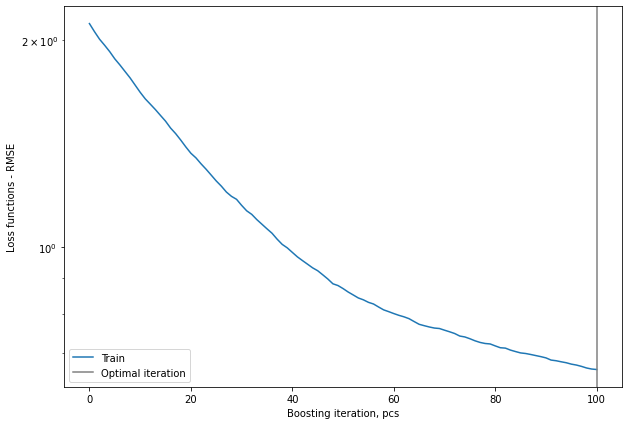

In [31]:
# Learning curves for the XGBoost model 
plt.figure(figsize=(10,7))
plt.yscale("log")
plt.plot(f_results['validation_0']['rmse'], label='Train')
plt.axvline(f_optimal_n, color="gray", label="Optimal iteration")
plt.xlabel("Boosting iteration, pcs")
plt.ylabel("Loss functions - RMSE")
plt.legend()

# Estimation of a final XGBoost model

In [32]:
"""
Assessment of linear approximation between observations and 
predict values and estimation of parameters uncertainties for this regression
"""
# Load libraries elements
from scipy.optimize import curve_fit   
from scipy import stats

# pip install uncertainties, if needed
try:
    import uncertainties.unumpy as unp
    import uncertainties as unc
except:
    try:
        from pip import main as pipmain
    except:
        from pip._internal import main as pipmain
    pipmain(['install','uncertainties'])
    import uncertainties.unumpy as unp
    import uncertainties as unc

In [33]:
# Convert data to 'array' type
f_conv_y_pred = pd.DataFrame(f_y_pred) # Double transformation
f_y_pred2 = f_conv_y_pred.values
f_y_train2 = f_y_train.values

# Intermediate results
f_n_sample = len(f_y_pred2)
f_main_sample = f_y_train.sum() / f_n_sample

# Calculation of bias
f_diff = f_y_pred2 - f_y_train2
f_bias = f_diff.sum()
print('Bias: %.1f' % (f_bias/f_n_sample))
print("Relative bias(%):", " %.2f" % (f_bias/f_main_sample))

# Calculation of RMSE
f_rmse = np.sqrt(mean_squared_error(f_y_train, f_y_pred))
print("RMSE: %.1f" % (f_rmse))
print("Relative RMSE(%):", " %.3f" % (f_rmse/f_main_sample))

# Calculation of MSE
f_mse = mean_squared_error(f_y_train, f_y_pred)
print("MSE: %.1f" % (f_mse))

# Calculation of Square R
f_R_square = r2_score(f_y_train, f_y_pred)
print("R square: %.1f%%" % (f_R_square * 100.0))

Bias: -0.1
Relative bias(%):  -5.06
RMSE: 0.7
Relative RMSE(%):  0.269
MSE: 0.4
R square: 45.7%


In [34]:
# Convert input data
f_x_train_conv = np.array(f_y_train)
f_x_train_convert = np.array([None]*f_n_sample)
for i in range(f_n_sample):
    f_x_train_convert[i] = float(f_x_train_conv[i])

x_plot = f_x_train_convert
y_plot = f_y_pred
n = len(y_plot)

# Function for fitting a linear curve and estimating its parameters
def f(x_plot, a0, a1):
    return a0 + a1 * x_plot

popt, pcov = curve_fit(f, x_plot, y_plot)

Optimal values of regression parameters
a0: 1.519
a1: 0.334
R^2: 0.577
Uncertainty
a0: 1.52+/-0.07
a1: 0.334+/-0.028


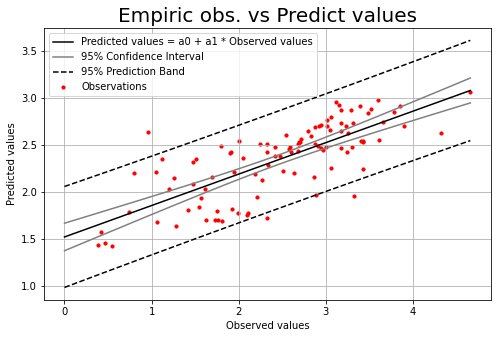

In [36]:
# Building linear a graph and calculation uncertainties
# retrieve parameter values
a0 = popt[0]
a1 = popt[1]
print('Optimal values of regression parameters')
print(f'a0: {a0:.3f}')
print(f'a1: {a1:.3f}')

# compute r^2
r2 = 1.0-(sum((y_plot-f(x_plot, a0, a1)) ** 2)/((n - 1.0)*np.var(y_plot, ddof = 1)))
f_r2 = round(r2, 3)
print(f'R^2: {r2:.3f}')

# calculate parameter confidence interval
a0, a1 = unc.correlated_values(popt, pcov)
print('Uncertainty')
print('a0: ' + str(a0))
print('a1: ' + str(a1))

# plot data
plt.figure(figsize =(8, 5))
plt.scatter(x_plot, y_plot, s = 10, c = 'red', label='Observations', marker = 'o')
plt.yscale('linear')

# estimation uncertenlies intervals
def predband(x_plot, xd, yd, p, func, conf=0.95):
    # x_plot = requested points
    # xd = x data
    # yd = y data
    # p = parameters
    # func = function name
    alpha = 1.0 - conf    # significance
    N = xd.size          # data sample size
    var_n = len(p)  # number of parameters
    # Quantile of Student's t distribution for p=(1-alpha/2)
    q = stats.t.ppf(1.0 - alpha / 2.0, N - var_n)
    # Stdev of an individual measurement
    se = np.sqrt(1. / (N - var_n) * \
                 np.sum((yd - func(xd, *p)) ** 2))
    # Auxiliary definitions
    sx = (x_plot - xd.mean()) ** 2
    sxd = np.sum((xd - xd.mean()) ** 2)
    # Predicted values (best-fit model)
    yp = func(x_plot, *p)
    # Prediction band
    dy = q * se * np.sqrt(1.0+ (1.0/N) + (sx/sxd))
    # Upper & lower prediction bands.
    lpb, upb = yp - dy, yp + dy
    return lpb, upb

# calculate regression confidence interval
px = np.linspace(0, max(x_plot), 100)
py = a0 + a1 * px
nom = unp.nominal_values(py)
std = unp.std_devs(py)

lpb, upb = predband(px, x_plot, y_plot, popt, f, conf=0.95)

# plot the regression
plt.plot(px, nom, c='black', label='Predicted values = a0 + a1 * Observed values')

# uncertainty lines (95% confidence)
plt.plot(px, nom - 1.96 * std, c='gray',\
         label='95% Confidence Interval')
plt.plot(px, nom + 1.96 * std, c='gray')

# prediction band (95% confidence)
plt.plot(px, lpb, 'k--',label='95% Prediction Band')
plt.plot(px, upb, 'k--')
plt.ylabel('Predicted values')
plt.xlabel('Observed values')
plt.grid(True)
plt.legend(loc='best')
plt.title('Empiric obs. vs Predict values', fontsize=20, color="black")
plt.show()

# ***Analisys output final the model***

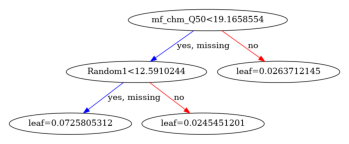

In [37]:
# Visualize the Decision tree (individual obs.)
xgb.plot_tree(f_xgb_model, num_trees=1) # "num_trees" is number of obs.
plt.rcParams['figure.figsize'] = [12, 45]
plt.show()

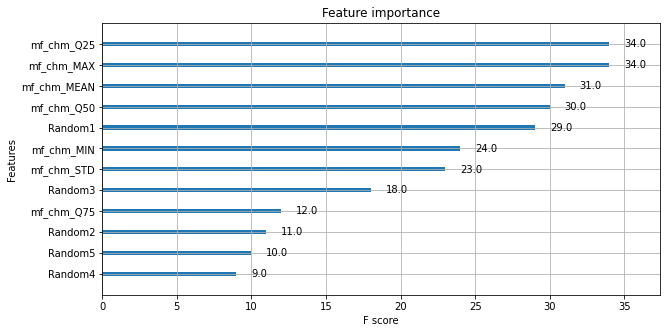

In [39]:
# Importance is calculated as: ”weight” is the number of times a feature appears in a trees
xgb.plot_importance(f_xgb_model, importance_type='weight')
plt.rcParams['figure.figsize'] = [10, 5]
plt.show()

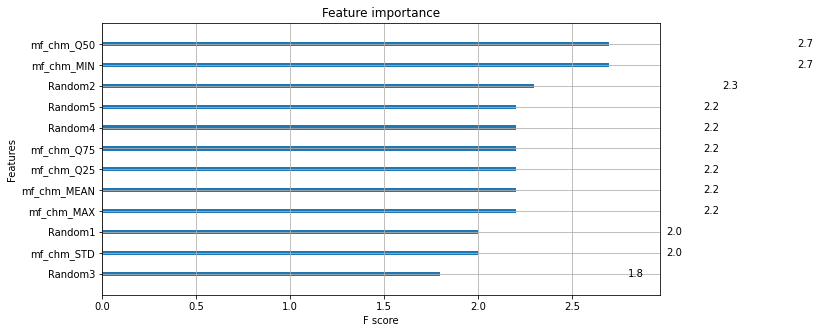

In [40]:
# Importance is calculated as: ”gain” is the average gain of splits which use the feature
# Get the booster from the xgbmodel
booster = f_xgb_model.get_booster()

# Get the importance dictionary (by gain) from the booster
importance = booster.get_score(importance_type="gain")

# make your changes
for key in importance.keys():
    importance[key] = round(importance[key], 1)

# provide the importance dictionary to the plotting function
ax = xgb.plot_importance(importance, importance_type='gain', show_values=True)

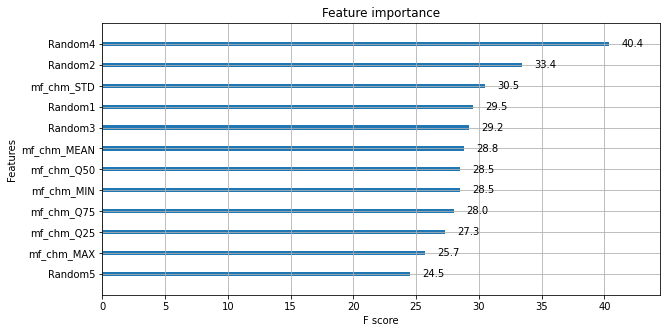

In [41]:
# Importance is calculated as: "cover” is the average coverage of splits which use the feature where coverage is defined as the number of samples affected by the split
# Get the booster from the xgbmodel
booster = f_xgb_model.get_booster()

# Get the importance dictionary (by gain) from the booster
importance = booster.get_score(importance_type="cover")

# make your changes
for key in importance.keys():
    importance[key] = round(importance[key],1)

# provide the importance dictionary to the plotting function
ax = xgb.plot_importance(importance, importance_type='cover', show_values=True)

# SHAP method

In [42]:
# Load SHAP`s library
import shap

In [43]:
# Сreate an уxplainer object
explainer = shap.TreeExplainer(f_xgb_model)
shap_values = explainer.shap_values(f_X_train)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


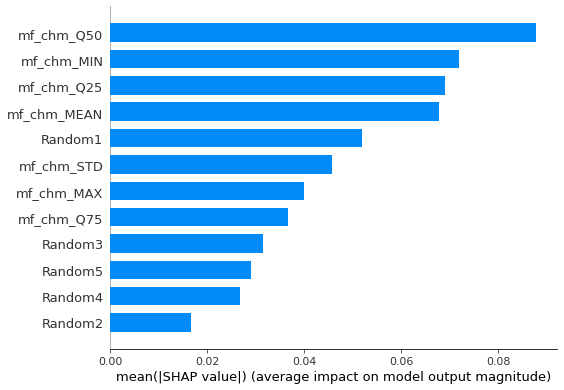

In [44]:
# Mean absolute value of the SHAP values for each feature 
shap.summary_plot(shap_values, f_X_train, plot_type="bar")

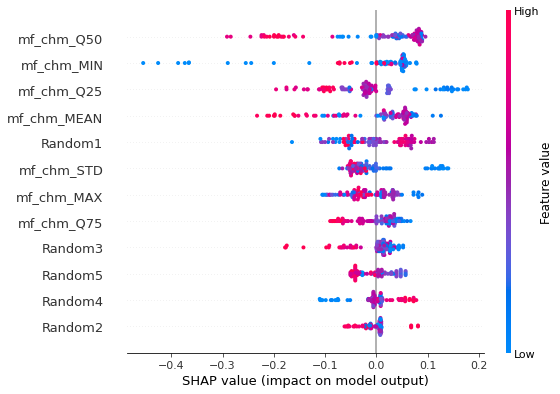

In [45]:
# Graph that summarises the effects of all the features
shap.summary_plot(shap_values, f_X_train)

In [ ]:
# Create a dependence scatter plot to show the effect of a single feature across the whole dataset
for name in X_train.columns:
    shap.dependence_plot(name, shap_values, f_X_train, color=shap_values)

# *Save XGBoost model*

In [ ]:
# Save to JSON
f_xgb_model.save_model("/home/dima/Desktop/JupyterLab/GIS and ML algoritms/5_Processing_data_for_level_sites/UAV_Tag_Sr_XGB_model_.json")
# Save to text format
f_xgb_model.save_model("/home/dima/Desktop/JupyterLab/GIS and ML algoritms/5_Processing_data_for_level_sites/UAV_Tag_St_XGB_model_.txt")